In [84]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, LabelEncoder


In [85]:
df = pl.read_csv("../data/raw_data/test.csv")

In [86]:
df.head(20)

obs,job_title,job_posted_date,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,job_desc_001,job_desc_002,job_desc_003,job_desc_004,job_desc_005,job_desc_006,job_desc_007,job_desc_008,job_desc_009,job_desc_010,job_desc_011,job_desc_012,job_desc_013,job_desc_014,job_desc_015,job_desc_016,job_desc_017,job_desc_018,job_desc_019,job_desc_020,job_desc_021,…,job_desc_264,job_desc_265,job_desc_266,job_desc_267,job_desc_268,job_desc_269,job_desc_270,job_desc_271,job_desc_272,job_desc_273,job_desc_274,job_desc_275,job_desc_276,job_desc_277,job_desc_278,job_desc_279,job_desc_280,job_desc_281,job_desc_282,job_desc_283,job_desc_284,job_desc_285,job_desc_286,job_desc_287,job_desc_288,job_desc_289,job_desc_290,job_desc_291,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300
i64,str,str,str,str,f64,bool,bool,bool,bool,bool,bool,bool,f64,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1281,"""Others""","""2024/06""","""CA""","""A""",0.6473,false,false,true,true,false,false,false,36.0,true,false,0.265933,2.070912,-0.646306,-0.318699,-0.181419,-0.406402,-0.555239,-0.625735,-0.488355,0.052571,-0.602128,-0.581684,0.51863,-0.044224,-0.271015,0.008895,0.236189,-0.152509,0.564038,-0.175079,3.536066,…,-0.912723,0.052374,0.419195,-0.223077,0.101507,-0.279963,-0.155815,-0.598799,-0.124844,0.193408,-0.324402,0.556537,-0.214403,-0.361113,0.395566,-0.100708,0.081053,-0.291276,-0.084332,0.614833,0.341948,-0.535607,-0.38584,-0.036796,-0.100846,-0.423849,0.003406,-0.054078,-0.573635,-0.306883,-0.325092,0.089463,-0.353476,-0.159314,-0.667958,-0.702116,-0.206267
1282,"""Others""","""2024/08""","""NY""","""A""",0.4238,true,false,false,false,false,false,false,60.0,true,false,0.134647,2.323485,-0.545002,-0.398136,-0.219534,-0.593899,-0.93401,-0.347509,-0.150662,-0.025937,-0.788193,-0.758666,0.395563,-0.069356,-0.18828,-0.038201,0.553241,-0.329062,0.405169,0.280156,3.380567,…,-1.098606,-0.149598,0.528904,0.063392,-0.291882,-0.414426,-0.078166,-0.276882,0.047211,0.264712,0.00745,0.525958,-0.012376,-0.31378,0.454644,-0.147099,0.38512,-0.784835,-0.293819,0.245624,0.277302,-0.678327,-0.459686,-0.096691,-0.042682,-0.497901,-0.12318,-0.868718,-0.337967,-0.179036,-0.717763,0.404843,0.032468,-0.190448,-1.261702,-0.505897,0.08208
1283,"""Others""","""2023/01""","""CA""","""A""",0.6219,true,false,false,true,true,false,false,120.0,true,true,-0.146202,2.149297,-0.473768,-0.035367,-0.059767,-0.347324,-0.462137,-0.635334,-0.460823,0.114211,-0.196667,-0.66675,0.199481,-0.359138,-0.244184,-0.03346,0.37871,-0.369817,0.560494,0.048275,3.746783,…,-0.74397,-0.036478,0.152495,-0.037869,-0.367833,-0.422593,0.24462,-0.238463,-0.038709,0.382557,-0.725669,0.36067,-0.064571,-0.200544,0.29764,-0.2071,0.574868,-0.784014,-0.08334,0.543385,0.521625,-0.876975,0.142426,0.028694,0.067733,-0.627439,-0.385466,-0.416109,-0.619822,-0.493653,-0.347556,0.071679,-0.331212,-0.381348,-0.50654,-0.773561,-0.105221
1284,"""Job_Title_5""","""2024/06""","""NY""","""A""",0.6704,false,false,false,true,false,false,false,36.0,true,false,0.278451,1.929512,-0.400708,-0.395092,0.01012,-0.280901,-0.719048,-0.251112,-0.182981,0.380781,-0.350532,-0.528154,0.531242,-0.328141,0.200239,0.136406,0.199327,-0.246777,0.501189,-0.470432,3.739622,…,-0.612868,-0.063049,0.588547,-0.198869,0.219284,-0.38354,-0.093432,-0.401378,-0.145946,0.446052,-0.765058,0.194471,-0.045353,-0.112149,0.28967,0.147988,0.422955,-0.687581,-0.015552,0.421841,0.290365,-0.965742,0.220519,-0.214108,0.211355,-0.609563,-0.238449,-0.29756,-0.481448,-0.497642,-0.254823,0.047404,-0.362739,-0.102704,-0.491272,-0.808156,-0.048326
1285,"""Others""","""2024/05""","""CA""","""A""",0.731,false,false,false,true,true,false,false,1

In [87]:
df.describe()

statistic,obs,job_title,job_posted_date,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,job_desc_001,job_desc_002,job_desc_003,job_desc_004,job_desc_005,job_desc_006,job_desc_007,job_desc_008,job_desc_009,job_desc_010,job_desc_011,job_desc_012,job_desc_013,job_desc_014,job_desc_015,job_desc_016,job_desc_017,job_desc_018,job_desc_019,job_desc_020,…,job_desc_264,job_desc_265,job_desc_266,job_desc_267,job_desc_268,job_desc_269,job_desc_270,job_desc_271,job_desc_272,job_desc_273,job_desc_274,job_desc_275,job_desc_276,job_desc_277,job_desc_278,job_desc_279,job_desc_280,job_desc_281,job_desc_282,job_desc_283,job_desc_284,job_desc_285,job_desc_286,job_desc_287,job_desc_288,job_desc_289,job_desc_290,job_desc_291,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300
str,f64,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",854.0,"""854""","""854""","""841""","""854""",854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,540.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,…,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0,854.0
"""null_count""",0.0,"""0""","""0""","""13""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,314.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1707.5,null,null,null,null,0.589357,0.111241,0.051522,0.163934,0.642857,0.430913,0.180328,0.010539,59.812963,0.940281,0.245902,0.188369,1.732765,-0.468946,-0.102276,-0.047403,-0.282029,-0.49803,-0.383792,-0.449142,0.25334,-0.24944,-0.548294,0.362187,-0.244974,0.105772,-0.027945,0.134754,-0.253523,0.370561,-0.233304,…,-0.555482,-0.135681,0.320618,-0.084953,0.088345,-0.305699,-0.070579,-0.304672,-0.065447,0.300472,-0.415682,0.427751,-0.136537,-0.195747,0.193272,-0.06536,0.283581,-0.526768,-0.038036,0.327651,0.268696,-0.634486,-0.06821,-0.105762,0.070828,-0.440471,-0.166779,-0.22932,-0.504626,-0.350823,-0.211593,0.057933,-0.300744,-0.125119,-0.613035,-0.705832,-0.061008
"""std""",246.67286,null,null,null,null,0.10685,null,null,null,null,null,null,null,37.783882,null,null,0.224091,0.77741,0.281218,0.271466,0.145747,0.190282,0.271678,0.215661,0.26806,0.225955,0.271589,0.277323,0.231369,0.198757,0.193692,0.190235,0.169589,0.164354,0.21809,0.213213,…,0.295615,0.189112,0.209657,0.168213,0.227525,0.214242,0.17881,0.222828,0.183067,0.189593,0.287888,0.28263,0.144489,0.181148,0.179748,0.186193,0.218709,0.298682,0.168881,0.205083,0.215963,0.303402,0.233075,0.187872,0.176516,0.22215,0.262157,0.231638,0.296922,0.253013,0.240217,0.133773,0.203875,0.161663,0.280836,0.325963,0.137698
"""min""",1281.0,"""Job_Title_1""","""2019/01""","""AL""","""A""",0.4127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,-0.606715,0.0,-1.305393,-1.281359,-0.76633,-0.892561,-1.393118,-1.169065,-1.163589,-0.713028,-1.173177,-1.396725,-0.389786,-0.824015,-0.637236,-0.74322,-0.445423,-0.856572,-0.490056,-0.924332,…,-1.32831,-0.759311,-0.605525,-0.752655,-0.509082,-1.182395,-0.956825,-1.022724,-1.015528,-1.132616,-1.298656,-0.379839,-0.635326,-0.796005,-0.684941,-0.855993,-0.290469,-1.157593,-0.646798,-0.375122,-0.615196,-1.367387,-0.706233,-1.078265,-1.039834,-1.005442,-1.678598,-1.191991,-1.307757,-1.255625,-1.136243,-0.682076,-1.189415,-0.824691,-1.30009,-1.332981,-0.531949
"""25%""",1494

In [88]:
(df["job_desc_001"] == 0.0).sum()

112

In [89]:
# job_state: 13/854, feature_10: 314/854, job_desc: 112/854

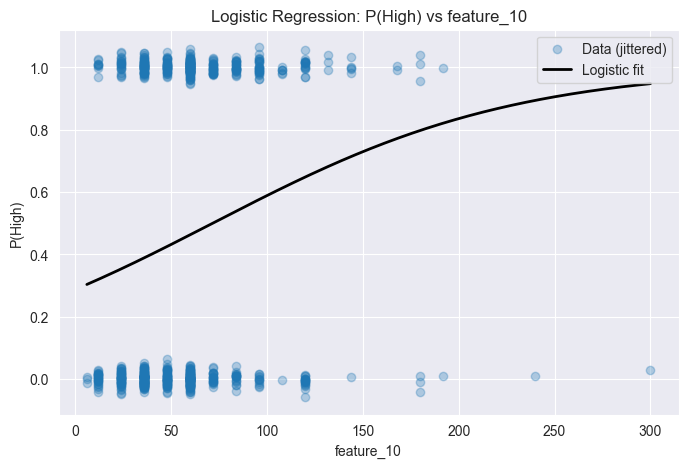

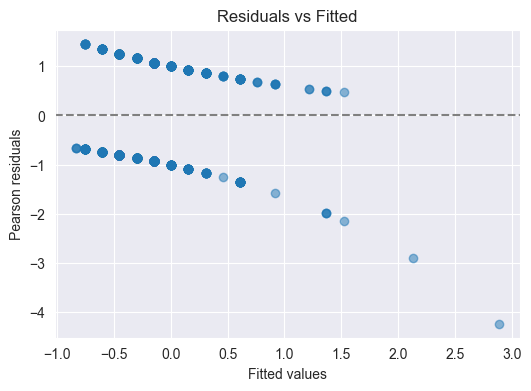

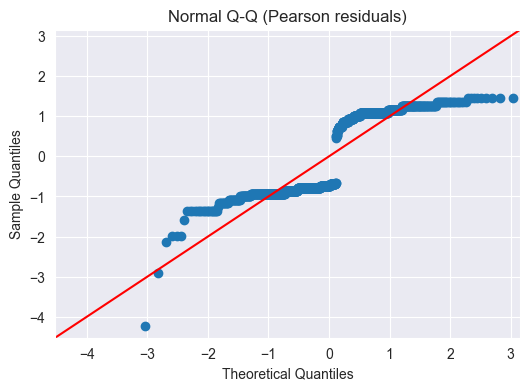

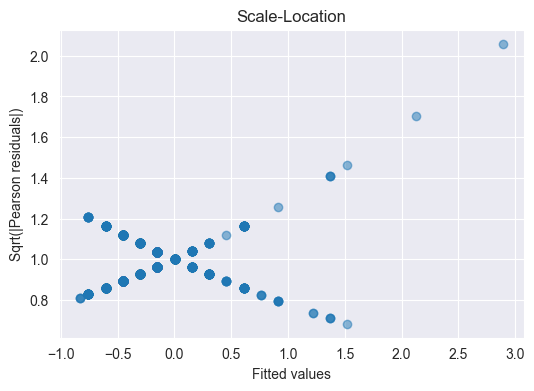

<Figure size 800x600 with 0 Axes>

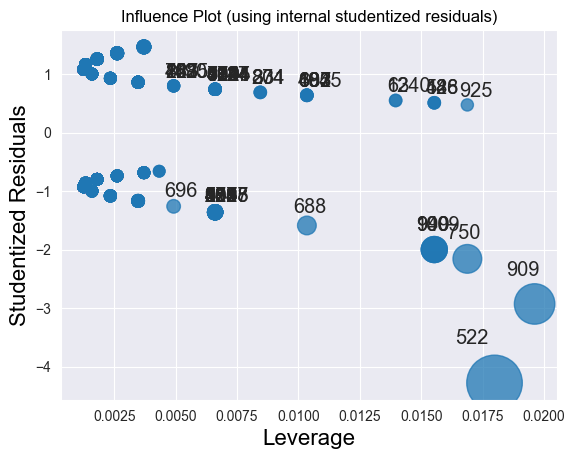

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.graphics.gofplots import qqplot

# 1. Load data
df = pd.read_csv("../data/raw_data/train.csv")

# 2. Drop any rows missing feature_10 or salary_category
df = df.dropna(subset=["feature_10", "salary_category"])

# 3. Make binary target: High vs not
df["y_high"] = (df["salary_category"] == "High").astype(int)

# 4. Design matrix (intercept + feature_10)
X = sm.add_constant(df["feature_10"])
y = df["y_high"]

# 5. Fit the logistic model
model = sm.Logit(y, X).fit(disp=False)

# 6. Plot raw data + fitted probability curve
x_vals = np.linspace(df["feature_10"].min(), df["feature_10"].max(), 200)
X_plot = sm.add_constant(x_vals)
y_plot = model.predict(X_plot)

plt.figure(figsize=(8, 5))
plt.scatter(df["feature_10"], df["y_high"] + np.random.normal(0, 0.02, len(df)),
            alpha=0.3, label="Data (jittered)")
plt.plot(x_vals, y_plot, "k-", lw=2, label="Logistic fit")
plt.xlabel("feature_10")
plt.ylabel("P(High)")
plt.title("Logistic Regression: P(High) vs feature_10")
plt.legend()
plt.show()

# 7. Compute residuals & influence
fitted = model.fittedvalues
resid_resp    = model.resid_response
resid_pearson = model.resid_pearson
influence     = model.get_influence()

# 7.1 Residuals vs Fitted (use Pearson or response residuals)
plt.figure(figsize=(6, 4))
plt.scatter(fitted, resid_pearson, alpha=0.5)
plt.axhline(0, linestyle="--", color="grey")
plt.xlabel("Fitted values")
plt.ylabel("Pearson residuals")
plt.title("Residuals vs Fitted")
plt.show()

# 7.2 Normal Q-Q of Pearson residuals
plt.figure(figsize=(6, 4))
qqplot(resid_pearson, line="45", ax=plt.gca())
plt.title("Normal Q-Q (Pearson residuals)")
plt.show()

# 7.3 Scale-Location: sqrt(|Pearson residuals|)
plt.figure(figsize=(6, 4))
plt.scatter(fitted, np.sqrt(np.abs(resid_pearson)), alpha=0.5)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt(|Pearson residuals|)")
plt.title("Scale-Location")
plt.show()

# 7.4 Influence plot (Cook’s distance)
plt.figure(figsize=(8, 6))
# tell it to use internal studentized residuals, not the external ones
influence_plot(model, criterion="cooks", size=40, external=False)
plt.title("Influence Plot (using internal studentized residuals)")
plt.show()


In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 y_high   No. Observations:                  834
Model:                          Logit   Df Residuals:                      832
Method:                           MLE   Df Model:                            1
Date:                Wed, 11 Jun 2025   Pseudo R-squ.:                 0.02585
Time:                        09:44:34   Log-Likelihood:                -559.77
converged:                       True   LL-Null:                       -574.62
Covariance Type:            nonrobust   LLR p-value:                 5.033e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9082      0.156     -5.814      0.000      -1.214      -0.602
feature_10     0.0127      0.002      5.164      0.000       0.008       0.017
==============================================================================
"""

In [92]:
df

,obs,job_title,job_posted_date,salary_category,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,...,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300,y_high
0,1,Others,2024/07,High,NY,A,0.6429,False,False,True,...,-0.499308,-0.367894,-0.214881,0.014870,-0.271177,-0.113347,-0.587955,-0.919095,-0.207340,1
1,2,Job_Title_1,2024/07,Low,CA,A,0.4678,False,False,False,...,-0.415411,-0.341824,-0.319064,0.042322,-0.124755,0.023489,-0.893224,-0.823024,0.112364,0
2,3,Others,2024/07,Low,CA,A,0.4610,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,4,Others,2024/07,Low,CA,A,0.5064,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,5,Others,2024/07,Low,CA,A,0.4640,False,False,False,...,-0.654657,-0.074398,-0.464479,0.081037,-0.136992,-0.276270,-0.696853,-0.601466,0.089939,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1268,Others,2023/01,High,NY,A,0.5885,False,False,False,...,-0.671931,-0.057354,-0.649291,0.288155,-0.234996,-0.052687,-0.779074,-0.849742,0.460499,1
1268,1269,Others,2024/03,High,NY,A,0.7143,False,False,False,...,-0.545941,-0.467270,0.015498,0.166812,-0.457394,-0.006537,-0.521862,-0.571044,0.032121,1
1269,1270,Others,2024/07,Low,CA,A,0.4586,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1272,1273,Others,2024/07,Low,AL,A,0.4691,False,False,False,...,-1.031351,-0.366249,0.741466,-0.102016,0.132157,-0.205844,-0.724913,-0.477329,0.110609,0


In [93]:
df.job_title.value_counts()

job_title
Others          579
Job_Title_8      34
Job_Title_10     29
Job_Title_3      28
Job_Title_5      28
Job_Title_2      24
Job_Title_1      19
Job_Title_7      19
Job_Title_11      7
Job_Title_19      7
Job_Title_23      6
Job_Title_16      6
Job_Title_13      5
Job_Title_4       5
Job_Title_12      5
Job_Title_17      4
Job_Title_6       4
Job_Title_26      4
Job_Title_9       3
Job_Title_24      3
Job_Title_18      3
Job_Title_15      3
Job_Title_22      3
Job_Title_25      2
Job_Title_20      2
Job_Title_14      1
Job_Title_21      1
Name: count, dtype: int64

In [94]:
#DF TEST HAS job_title_27 EXTRA

In [95]:
df_test = pd.read_csv("../data/raw_data/test.csv")
df_test.job_title.value_counts().index.sort_values()

Index(['Job_Title_1', 'Job_Title_10', 'Job_Title_11', 'Job_Title_12',
       'Job_Title_13', 'Job_Title_14', 'Job_Title_15', 'Job_Title_16',
       'Job_Title_17', 'Job_Title_18', 'Job_Title_19', 'Job_Title_2',
       'Job_Title_20', 'Job_Title_21', 'Job_Title_22', 'Job_Title_23',
       'Job_Title_24', 'Job_Title_25', 'Job_Title_26', 'Job_Title_27',
       'Job_Title_3', 'Job_Title_4', 'Job_Title_5', 'Job_Title_6',
       'Job_Title_7', 'Job_Title_8', 'Job_Title_9', 'Others'],
      dtype='object', name='job_title')

In [96]:
df.job_title.value_counts().index.sort_values()

Index(['Job_Title_1', 'Job_Title_10', 'Job_Title_11', 'Job_Title_12',
       'Job_Title_13', 'Job_Title_14', 'Job_Title_15', 'Job_Title_16',
       'Job_Title_17', 'Job_Title_18', 'Job_Title_19', 'Job_Title_2',
       'Job_Title_20', 'Job_Title_21', 'Job_Title_22', 'Job_Title_23',
       'Job_Title_24', 'Job_Title_25', 'Job_Title_26', 'Job_Title_3',
       'Job_Title_4', 'Job_Title_5', 'Job_Title_6', 'Job_Title_7',
       'Job_Title_8', 'Job_Title_9', 'Others'],
      dtype='object', name='job_title')

In [97]:
df_test.job_title.value_counts()

job_title
Others          580
Job_Title_3      48
Job_Title_10     46
Job_Title_5      38
Job_Title_7      27
Job_Title_2      18
Job_Title_8      16
Job_Title_13     13
Job_Title_1      13
Job_Title_19      8
Job_Title_12      7
Job_Title_23      7
Job_Title_6       4
Job_Title_27      4
Job_Title_16      3
Job_Title_21      3
Job_Title_17      3
Job_Title_20      2
Job_Title_22      2
Job_Title_15      2
Job_Title_14      2
Job_Title_24      2
Job_Title_9       1
Job_Title_11      1
Job_Title_25      1
Job_Title_18      1
Job_Title_4       1
Job_Title_26      1
Name: count, dtype: int64

In [98]:
_mapping = {"Low": 0, "Medium": 1, "High": 2}
df = pd.read_csv("../data/raw_data/train.csv")
# make sure salary_category is a Utf8 column, then map & cast to Int32
df["salary_category"] = df["salary_category"].map(_mapping)
pd.concat([df.groupby("job_title")["salary_category"].mean(), df.groupby("job_title")["salary_category"].std(), df.job_title.value_counts()], axis=1).fillna(100)

,salary_category,salary_category,count
job_title,,,
Job_Title_1,1.000000,0.620174,27
Job_Title_10,0.660377,0.618416,53
Job_Title_11,1.888889,0.333333,9
Job_Title_12,2.000000,0.000000,7
Job_Title_13,1.545455,0.820200,11
Job_Title_14,0.333333,0.577350,3
Job_Title_15,2.000000,0.000000,4
Job_Title_16,1.333333,0.816497,6
Job_Title_17,2.000000,0.000000,4


In [99]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
df = pd.read_csv("../data/raw_data/train.csv")
# Example DataFrame: df with 'job_title' and 'salary_category'
# You might need to group rare job titles into 'Other' first
title_counts = df['job_title'].value_counts()
rare_titles = title_counts[title_counts < 1].index
df['job_title'] = df['job_title'].apply(lambda x: 'Other' if x in rare_titles else x)

# Cross-tabulate job_title vs. salary_category
contingency = pd.crosstab(df['job_title'], df['salary_category'])

# Run Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency)

# Compute standardized residuals
observed = contingency.values
residuals = (observed - expected) / np.sqrt(expected)

# Create DataFrame of residuals
residuals_df = pd.DataFrame(residuals, index=contingency.index, columns=contingency.columns)
residuals_df.sort_values(by='High', ascending=False)


salary_category,High,Low,Medium
job_title,,,
Job_Title_12,2.573728,-1.513739,-1.403122
Job_Title_19,2.573728,-1.513739,-1.403122
Job_Title_11,2.385532,-1.716419,-0.962451
Job_Title_15,1.945555,-1.144279,-1.060660
Job_Title_17,1.945555,-1.144279,-1.060660
Job_Title_9,1.945555,-1.144279,-1.060660
Job_Title_26,1.945555,-1.144279,-1.060660
Job_Title_21,1.945555,-1.144279,-1.060660
Job_Title_13,1.780529,-0.843594,-1.190371


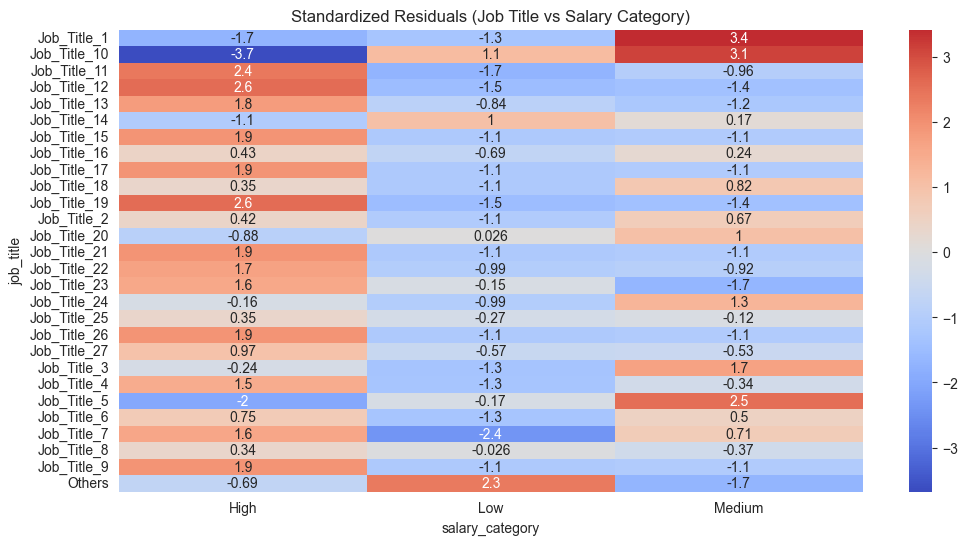

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(residuals_df, annot=True, cmap='coolwarm', center=0)
plt.title("Standardized Residuals (Job Title vs Salary Category)")
plt.show()


In [101]:
expected

array([[1.05679688e+01, 8.83828125e+00, 7.59375000e+00],
       [2.07445313e+01, 1.73492187e+01, 1.49062500e+01],
       [3.52265625e+00, 2.94609375e+00, 2.53125000e+00],
       [2.73984375e+00, 2.29140625e+00, 1.96875000e+00],
       [4.30546875e+00, 3.60078125e+00, 3.09375000e+00],
       [1.17421875e+00, 9.82031250e-01, 8.43750000e-01],
       [1.56562500e+00, 1.30937500e+00, 1.12500000e+00],
       [2.34843750e+00, 1.96406250e+00, 1.68750000e+00],
       [1.56562500e+00, 1.30937500e+00, 1.12500000e+00],
       [1.56562500e+00, 1.30937500e+00, 1.12500000e+00],
       [2.73984375e+00, 2.29140625e+00, 1.96875000e+00],
       [1.25250000e+01, 1.04750000e+01, 9.00000000e+00],
       [2.34843750e+00, 1.96406250e+00, 1.68750000e+00],
       [1.56562500e+00, 1.30937500e+00, 1.12500000e+00],
       [1.17421875e+00, 9.82031250e-01, 8.43750000e-01],
       [3.91406250e+00, 3.27343750e+00, 2.81250000e+00],
       [1.17421875e+00, 9.82031250e-01, 8.43750000e-01],
       [1.56562500e+00, 1.30937

In [102]:
df.salary_category.mean()

TypeError: Could not convert string 'HighLowLowLowLowHighLowLowHighHighLowLowHighHighMediumHighMediumLowHighHighMediumHighHighLowMediumHighLowMediumHighLowHighLowMediumMediumMediumHighLowMediumHighHighHighHighLowHighLowLowHighHighMediumMediumMediumMediumMediumHighHighLowHighHighMediumLowHighMediumMediumHighMediumLowHighHighHighHighLowMediumMediumHighLowHighHighLowHighLowMediumHighMediumHighLowLowLowHighLowHighMediumHighLowHighHighMediumMediumHighMediumLowHighLowMediumHighMediumHighHighHighMediumMediumLowHighMediumHighHighHighHighLowHighLowLowHighLowMediumLowLowMediumLowMediumLowLowLowHighLowHighHighHighLowLowHighHighHighHighMediumLowLowLowMediumLowHighMediumLowHighMediumMediumMediumHighLowLowHighLowLowMediumMediumHighHighHighMediumMediumHighLowHighHighHighHighHighHighLowMediumMediumMediumLowLowMediumHighHighLowMediumLowHighLowLowLowHighLowHighLowLowHighLowMediumLowMediumHighHighHighMediumHighLowMediumLowMediumLowHighHighHighMediumHighHighLowLowLowMediumHighMediumHighLowLowMediumHighHighLowLowMediumLowHighLowLowMediumHighMediumMediumLowLowHighLowHighLowMediumMediumLowLowLowMediumMediumLowHighMediumHighMediumMediumHighHighLowHighMediumMediumHighLowMediumHighLowHighHighLowLowMediumMediumMediumLowHighMediumLowLowMediumLowLowMediumMediumHighHighMediumMediumLowMediumHighHighLowLowHighLowLowLowLowLowHighLowLowMediumHighMediumLowMediumMediumLowLowLowLowLowMediumHighHighMediumHighMediumHighLowMediumHighLowLowHighMediumMediumMediumHighMediumLowLowHighHighMediumMediumHighLowLowHighHighLowMediumHighHighHighHighHighMediumMediumMediumLowLowHighMediumLowHighHighMediumLowHighLowMediumMediumLowMediumHighLowLowHighHighLowHighLowMediumHighLowMediumHighMediumMediumHighLowLowMediumHighLowMediumHighHighMediumLowHighMediumMediumLowHighLowHighHighMediumHighHighMediumMediumMediumHighHighHighHighMediumMediumHighMediumHighLowLowLowHighHighHighLowMediumMediumLowLowHighHighLowHighLowMediumHighLowLowMediumHighHighMediumLowMediumHighLowLowHighHighLowHighHighHighLowLowLowMediumLowHighHighLowHighHighHighHighHighHighLowHighMediumHighLowLowHighMediumMediumHighHighMediumHighMediumLowLowHighMediumLowLowMediumLowLowHighMediumLowHighHighMediumLowHighHighLowLowHighHighHighLowLowMediumHighLowHighLowMediumLowLowHighMediumHighHighMediumHighLowHighHighHighLowLowHighHighHighMediumHighHighLowLowHighHighLowHighHighLowMediumLowMediumLowMediumLowLowMediumLowLowLowLowHighMediumMediumMediumMediumMediumMediumMediumMediumMediumHighMediumMediumMediumHighLowMediumMediumLowLowLowMediumHighHighMediumMediumHighMediumHighHighHighLowHighMediumMediumMediumHighLowHighHighLowHighMediumHighHighMediumHighHighHighMediumLowMediumMediumHighHighHighLowHighHighLowLowHighLowMediumHighLowLowMediumLowMediumMediumHighHighHighMediumHighHighHighLowHighHighLowHighLowHighHighLowMediumMediumHighHighHighLowHighLowHighLowHighMediumMediumMediumHighHighMediumMediumLowLowHighHighLowMediumHighLowHighLowLowMediumMediumLowMediumHighMediumLowLowLowLowLowHighLowHighMediumHighLowLowMediumHighMediumHighLowLowMediumLowMediumMediumLowLowHighLowHighMediumMediumLowLowHighLowHighLowLowLowMediumLowMediumHighMediumHighMediumMediumMediumMediumHighHighLowMediumMediumLowMediumMediumHighLowMediumHighHighHighMediumMediumHighHighMediumHighMediumLowMediumLowLowLowLowHighHighLowHighLowMediumHighHighLowMediumLowMediumLowMediumMediumLowHighMediumLowLowLowHighLowMediumLowMediumLowHighLowHighHighLowHighLowHighHighHighLowHighLowHighLowLowLowHighHighLowLowHighLowHighHighMediumMediumLowHighMediumLowMediumLowMediumHighLowHighLowHighHighLowLowHighHighLowMediumLowHighLowLowHighLowHighHighHighHighLowLowMediumMediumHighLowHighHighMediumLowHighMediumHighLowMediumMediumLowMediumLowMediumMediumLowLowLowLowHighMediumHighMediumLowMediumMediumMediumHighLowHighMediumLowLowHighLowLowHighHighLowLowLowHighLowHighLowHighHighHighMediumLowLowHighLowHighMediumLowHighHighLowHighLowHighLowMediumHighHighMediumHighLowLowHighLowMediumLowHighHighLowHighLowMediumHighHighHighMediumHighHighLowHighHighMediumHighMediumMediumMediumLowMediumLowMediumHighLowHighMediumLowMediumHighLowLowMediumLowHighHighLowLowLowLowHighMediumLowHighMediumHighMediumMediumMediumMediumLowHighHighLowHighHighMediumHighHighLowLowHighHighMediumLowMediumMediumMediumHighMediumHighMediumMediumMediumMediumLowHighHighMediumHighMediumHighLowMediumMediumHighMediumLowHighHighMediumLowMediumLowMediumMediumHighLowLowHighLowMediumMediumLowMediumHighLowLowHighLowLowMediumLowMediumMediumLowHighLowLowHighLowMediumHighHighMediumHighMediumHighMediumHighLowHighLowMediumMediumMediumHighHighHighHighMediumLowLowHighHighHighMediumHighMediumHighHighHighLowLowLowMediumLowMediumMediumHighLowHighLowLowHighMediumHighHighHighHighLowLowHighLowMediumLowLowHighLowHighLowMediumLowLowHighHighMediumLowMediumHighMediumHighLowHighMediumHighHighMediumLowMediumHighMediumHighHighLowLowMediumHighHighLowHighHighHighLowHighMediumLowHighMediumHighHighMediumHighLowMediumLowHighMediumHighHighLowHighHighMediumHighHighMediumMediumMediumLowMediumLowMediumHighHighMediumHighHighLowHighHighLowHighMediumMediumHighLowMediumLowMediumHighHighHighHighMediumMediumHighLowMediumMediumLowLowLowMediumHighLowLowMediumMediumMediumLowLowHighHighHighHighLowHighHighHighHighHighHighHighHighMediumMediumHighHighLowHighHighMediumHighHighMediumMediumLowMediumMediumMediumMediumLowLowHighHighHighLowHighLowHighMediumMediumLowHighLowHighHighMediumLowHighMediumHighLowLowMediumMediumLowHighHighHighHighHighHighHighMediumLowHighHighMediumMediumHighHighLowLowHighLowMediumHighHighHighMediumMediumMedium' to numeric

In [72]:
df.feature_1.value_counts()

feature_1
A    1232
B      36
C       6
D       5
E       1
Name: count, dtype: int64

In [73]:
df_test.feature_1.value_counts()

feature_1
A    819
B     26
D      4
C      3
E      2
Name: count, dtype: int64

In [79]:
_mapping = {"Low": 0, "Medium": 1, "High": 2}
df = pd.read_csv("../data/raw_data/train.csv")
# make sure salary_category is a Utf8 column, then map & cast to Int32
df["salary_category"] = df["salary_category"].map(_mapping)
pd.concat([df.groupby("feature_1")["salary_category"].mean(), df.feature_1.value_counts()], axis=1).fillna(100)

,salary_category,count
feature_1,,
A,1.103084,1232
B,0.000000,36
C,0.000000,6
D,0.600000,5
E,0.000000,1


In [80]:
df_test.feature_1.value_counts()

feature_1
A    819
B     26
D      4
C      3
E      2
Name: count, dtype: int64

In [83]:
df.salary_category.value_counts() / len(df)

salary_category
2    0.391406
0    0.327344
1    0.281250
Name: count, dtype: float64

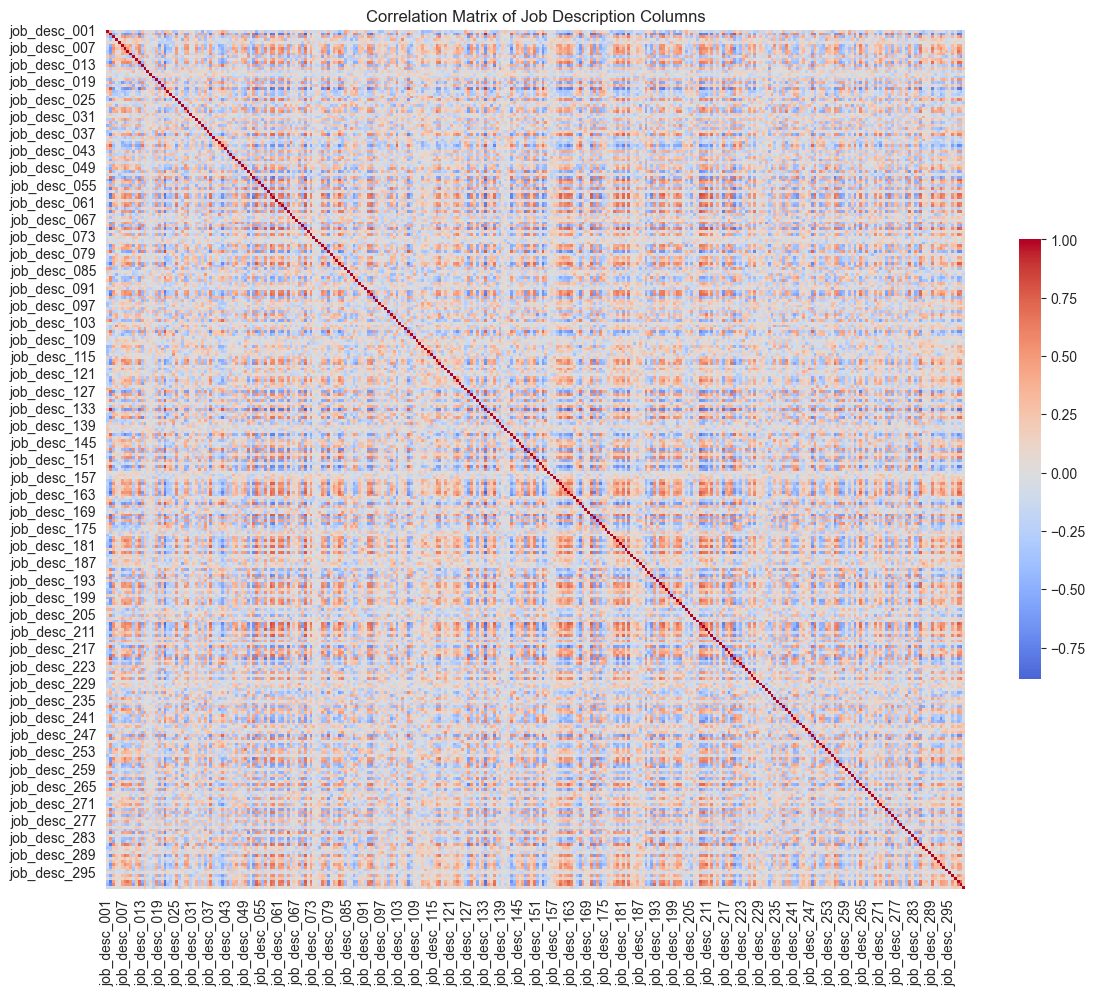

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select job description columns
job_desc_cols = [f"job_desc_{i:03d}" for i in range(1, 301)]
jb = df[job_desc_cols]

# Compute correlation matrix
corr_matrix = jb.corr()

# Plot using seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True, cbar_kws={'shrink': 0.5})
plt.title("Correlation Matrix of Job Description Columns")
plt.tight_layout()
plt.show()


In [111]:
import pandas as pd
import numpy as np

# Compute the correlation matrix
corr_matrix = jb.corr()

# Unstack the matrix to get pairs
corr_unstacked = corr_matrix.unstack()

# Drop self-correlations
corr_unstacked = corr_unstacked[corr_unstacked.index.get_level_values(0) != corr_unstacked.index.get_level_values(1)]

# Sort by correlation value
sorted_corr = corr_unstacked.sort_values(ascending=False)

# Drop duplicate pairs (e.g., (A, B) and (B, A))
sorted_corr = sorted_corr[~sorted_corr.index.duplicated()]

# Display top N
top_n = 100
print(f"Top {top_n} highest correlation pairs:")
print(sorted_corr.head(top_n))


Top 100 highest correlation pairs:
job_desc_133  job_desc_002    0.936460
job_desc_002  job_desc_133    0.936460
job_desc_021  job_desc_133    0.866291
job_desc_133  job_desc_021    0.866291
job_desc_021  job_desc_153    0.835059
                                ...   
job_desc_181  job_desc_053    0.752778
job_desc_285  job_desc_070    0.752700
job_desc_070  job_desc_285    0.752700
job_desc_002  job_desc_041    0.751816
job_desc_041  job_desc_002    0.751816
Length: 100, dtype: float64
